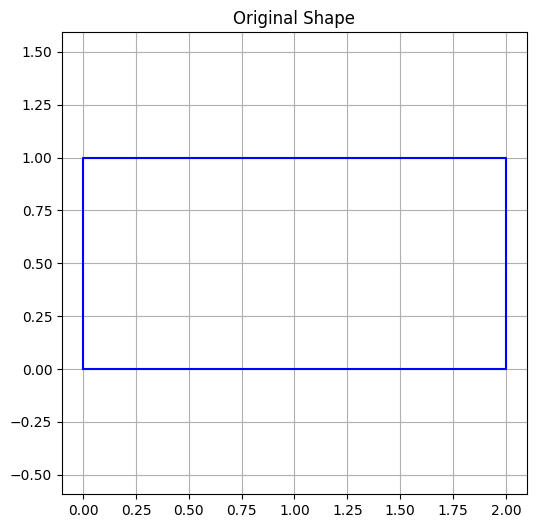

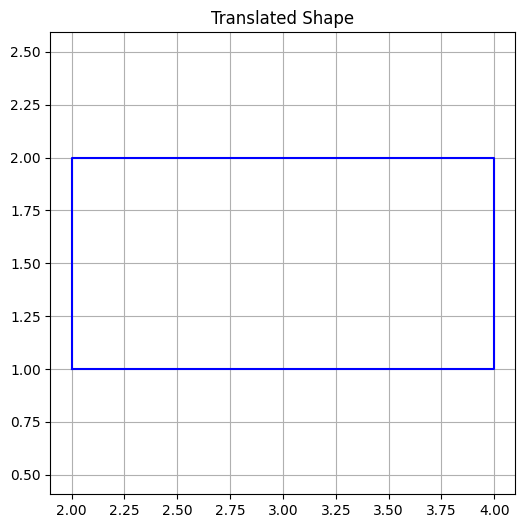

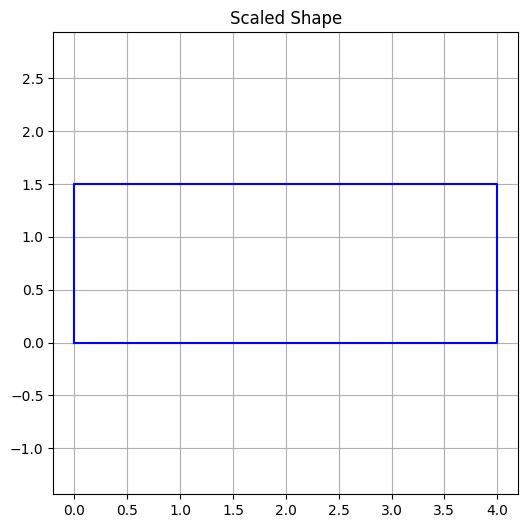

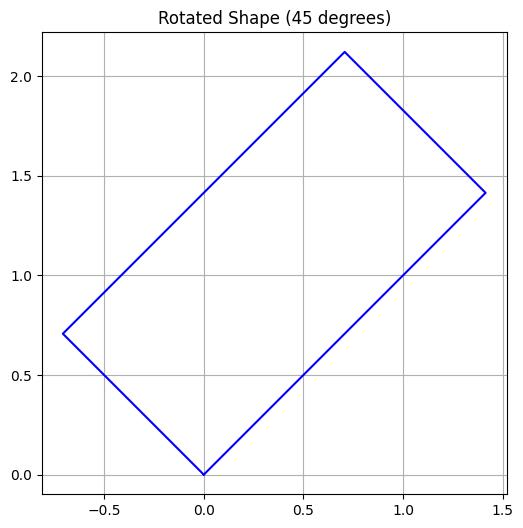

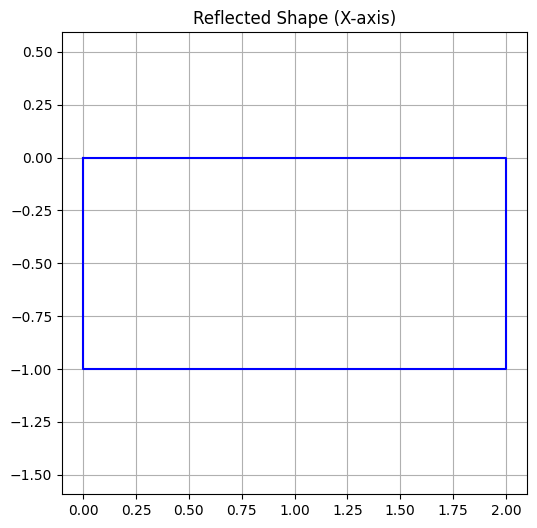

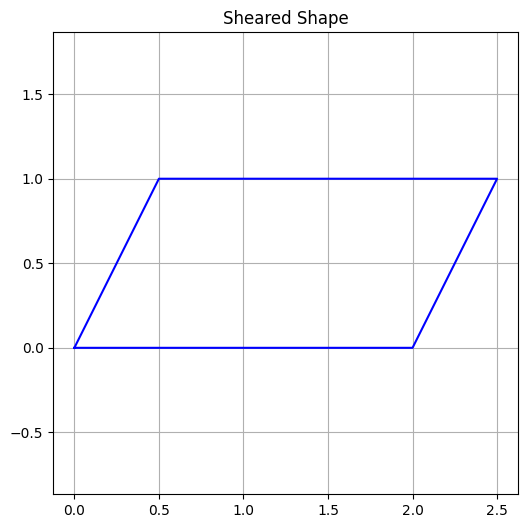

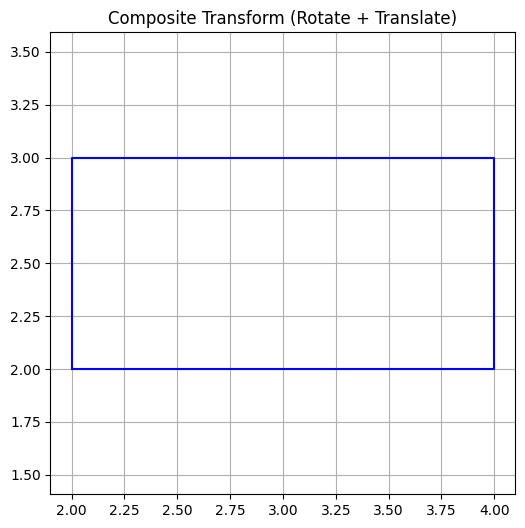

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Transform2D:
    def __init__(self):
        # Create a sample rectangle as default shape
        self.points = np.array([
            [0, 0, 1],  # Bottom-left
            [2, 0, 1],  # Bottom-right
            [2, 1, 1],  # Top-right
            [0, 1, 1]   # Top-left
        ]).T  # Transpose for easier matrix multiplication

    def plot_shape(self, points, title="Shape"):
        plt.figure(figsize=(6, 6))
        # Plot the shape by connecting points
        x = points[0]
        y = points[1]
        plt.plot(np.append(x, x[0]), np.append(y, y[0]), 'b-')
        plt.grid(True)
        plt.title(title)
        plt.axis('equal')
        plt.show()

    def translate(self, dx, dy):
        translation_matrix = np.array([
            [1, 0, dx],
            [0, 1, dy],
            [0, 0, 1]
        ])
        return np.dot(translation_matrix, self.points)

    def scale(self, sx, sy):
        scaling_matrix = np.array([
            [sx, 0, 0],
            [0, sy, 0],
            [0, 0, 1]
        ])
        return np.dot(scaling_matrix, self.points)

    def rotate(self, angle_degrees):
        angle = np.radians(angle_degrees)
        rotation_matrix = np.array([
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle), np.cos(angle), 0],
            [0, 0, 1]
        ])
        return np.dot(rotation_matrix, self.points)

    def reflect(self, axis='x'):
        if axis.lower() == 'x':
            reflection_matrix = np.array([
                [1, 0, 0],
                [0, -1, 0],
                [0, 0, 1]
            ])
        else:  # y-axis
            reflection_matrix = np.array([
                [-1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]
            ])
        return np.dot(reflection_matrix, self.points)

    def shear(self, shx=0, shy=0):
        shear_matrix = np.array([
            [1, shx, 0],
            [shy, 1, 0],
            [0, 0, 1]
        ])
        return np.dot(shear_matrix, self.points)

    def composite_transform(self, transformations):
        """
        Apply multiple transformations in sequence
        transformations: list of (function, args) tuples
        """
        result = self.points.copy()
        for transform_func, args in transformations:
            result = transform_func(*args)
        return result

# Example usage
if __name__ == "__main__":
    transform = Transform2D()

    # Original shape
    transform.plot_shape(transform.points, "Original Shape")

    # Translation
    translated = transform.translate(2, 1)
    transform.plot_shape(translated, "Translated Shape")

    # Scaling
    scaled = transform.scale(2, 1.5)
    transform.plot_shape(scaled, "Scaled Shape")

    # Rotation
    rotated = transform.rotate(45)
    transform.plot_shape(rotated, "Rotated Shape (45 degrees)")

    # Reflection
    reflected = transform.reflect('x')
    transform.plot_shape(reflected, "Reflected Shape (X-axis)")

    # Shearing
    sheared = transform.shear(0.5, 0)
    transform.plot_shape(sheared, "Sheared Shape")

    # Composite transformation (rotate then translate)
    composite = transform.composite_transform([
        (transform.rotate, (45,)),
        (transform.translate, (2, 2))
    ])
    transform.plot_shape(composite, "Composite Transform (Rotate + Translate)")

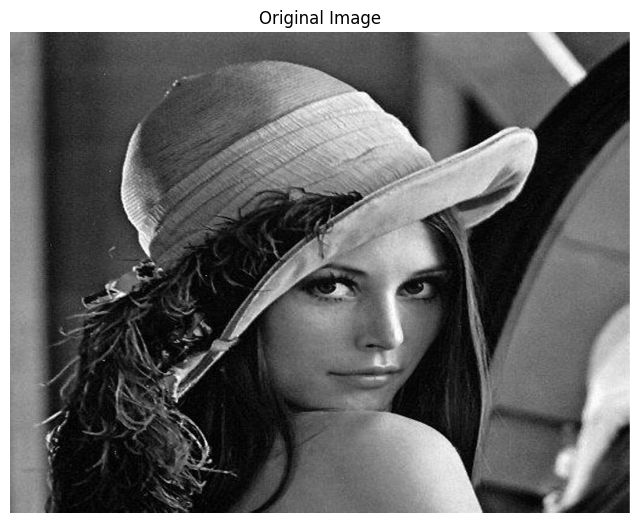

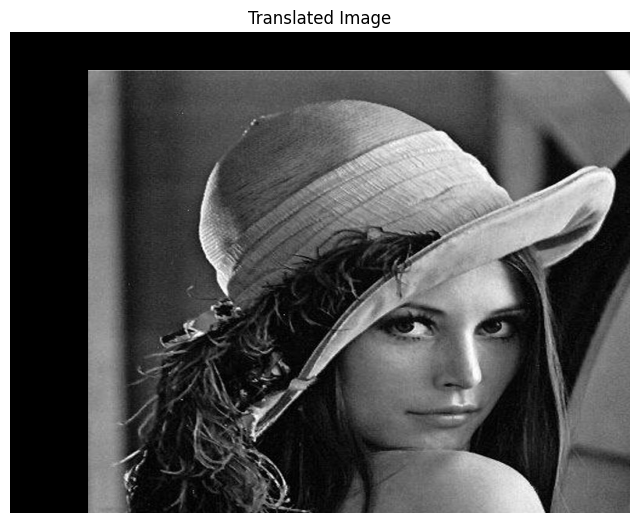

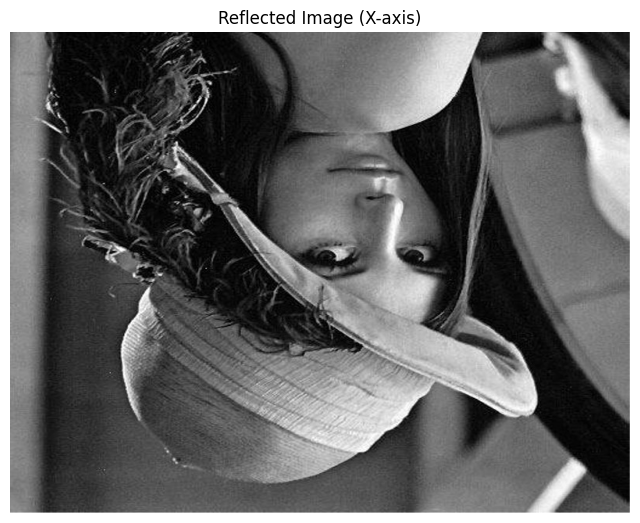

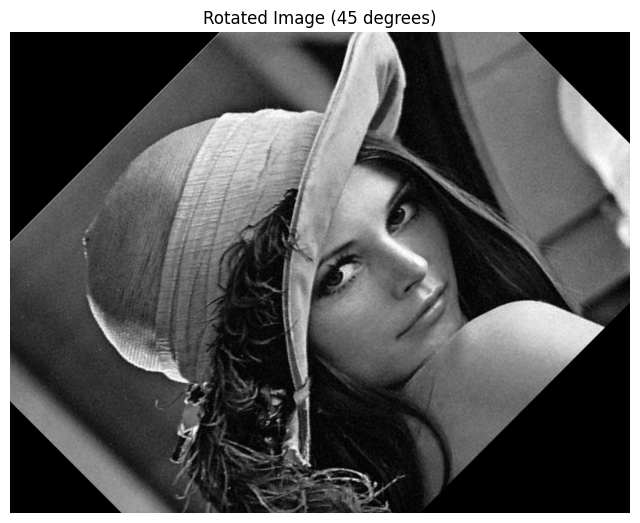

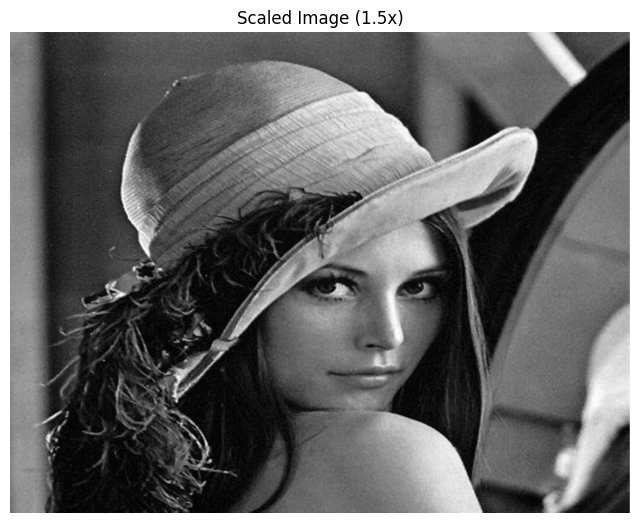

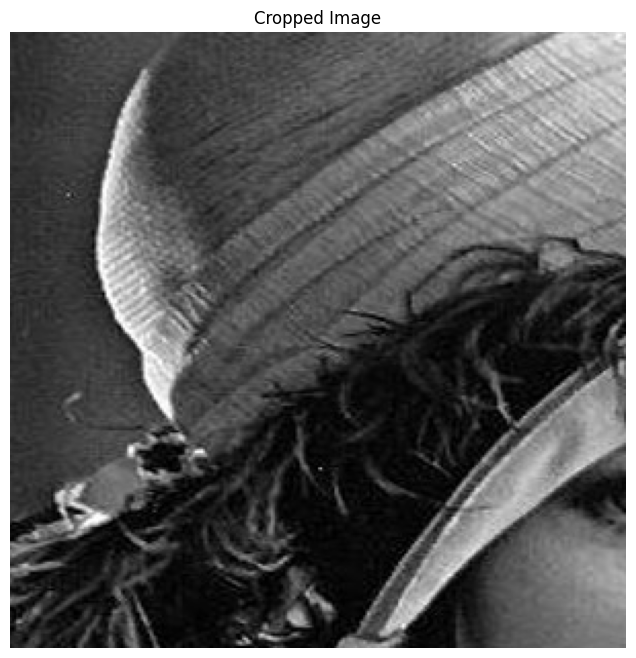

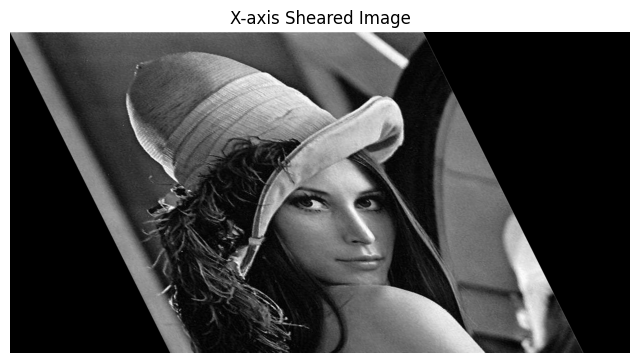

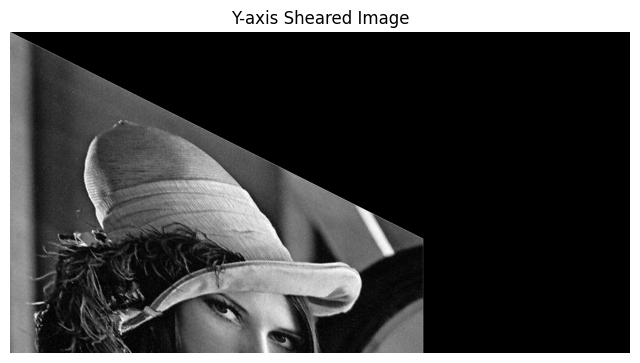

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageTransformer:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path)
        if self.image is None:
            raise ValueError("Could not load image")
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

    def show_image(self, img, title="Image"):
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()

    def translate(self, dx, dy):
        rows, cols = self.image.shape[:2]
        translation_matrix = np.float32([
            [1, 0, dx],
            [0, 1, dy]
        ])
        translated = cv2.warpAffine(self.image, translation_matrix, (cols, rows))
        return translated

    def reflect(self, axis='x'):
        if axis.lower() == 'x':
            reflected = cv2.flip(self.image, 0)  # 0 for x-axis
        else:
            reflected = cv2.flip(self.image, 1)  # 1 for y-axis
        return reflected

    def rotate(self, angle, scale=1.0):
        rows, cols = self.image.shape[:2]
        center = (cols/2, rows/2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
        rotated = cv2.warpAffine(self.image, rotation_matrix, (cols, rows))
        return rotated

    def scale(self, fx, fy):
        scaled = cv2.resize(self.image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
        return scaled

    def crop(self, x, y, width, height):
        return self.image[y:y+height, x:x+width]

    def shear(self, axis='x', factor=0.5):
        rows, cols = self.image.shape[:2]

        if axis.lower() == 'x':
            shear_matrix = np.float32([
                [1, factor, 0],
                [0, 1, 0]
            ])
        else:  # y-axis
            shear_matrix = np.float32([
                [1, 0, 0],
                [factor, 1, 0]
            ])

        sheared = cv2.warpAffine(self.image, shear_matrix, (int(cols*1.5), rows))
        return sheared

# Example usage
if __name__ == "__main__":
    # Replace 'image.jpg' with your image path
    transformer = ImageTransformer('SAMPLE.jpg')

    # Show original image
    transformer.show_image(transformer.image, "Original Image")

    # Translation
    translated = transformer.translate(100, 50)
    transformer.show_image(translated, "Translated Image")

    # Reflection
    reflected_x = transformer.reflect('x')
    transformer.show_image(reflected_x, "Reflected Image (X-axis)")

    # Rotation
    rotated = transformer.rotate(45)
    transformer.show_image(rotated, "Rotated Image (45 degrees)")

    # Scaling
    scaled = transformer.scale(1.5, 1.5)
    transformer.show_image(scaled, "Scaled Image (1.5x)")

    # Cropping
    cropped = transformer.crop(100, 100, 300, 300)
    transformer.show_image(cropped, "Cropped Image")

    # Shearing
    sheared_x = transformer.shear('x')
    transformer.show_image(sheared_x, "X-axis Sheared Image")

    sheared_y = transformer.shear('y')
    transformer.show_image(sheared_y, "Y-axis Sheared Image")